In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
easy = pd.read_csv('results/hardest11_improved_simulation_results.csv')
easy.shape

(120, 11)

In [3]:
solved = easy[easy['solved'] == 1]
unsolved = easy[easy['solved'] == 0]
solved.shape

(3, 11)

In [4]:
print("Number of distinct sudoku solved:", len(solved.puzzle_id.unique()))

Number of distinct sudoku solved: 2


In [5]:
solved.head()

,puzzle_id,solved,final_fitness,time_seconds,generations_run,population_size,mutation_rate,generations,selection_rate,nb_children,restart_after_n_stagnant
60,6,1,0,140.23,387,5000,0.3,1000,0.4,5,150
61,9,1,0,338.60,930,5000,0.3,1000,0.2,10,150
101,6,1,0,23.84,63,5000,0.4,1000,0.2,10,150


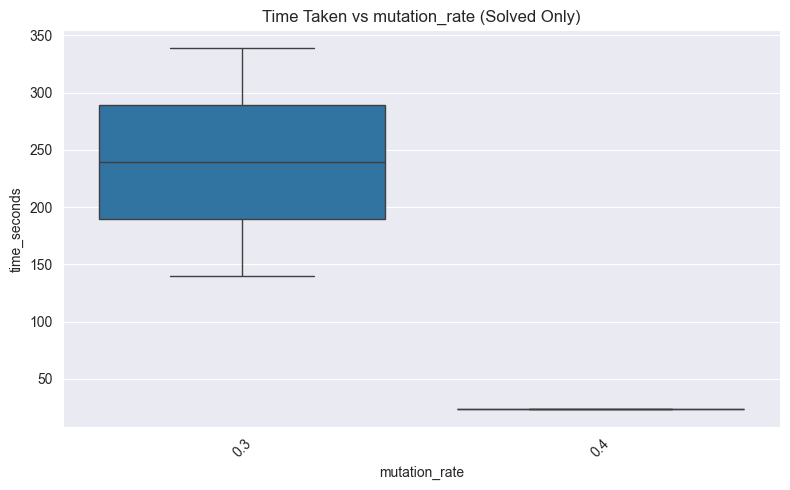

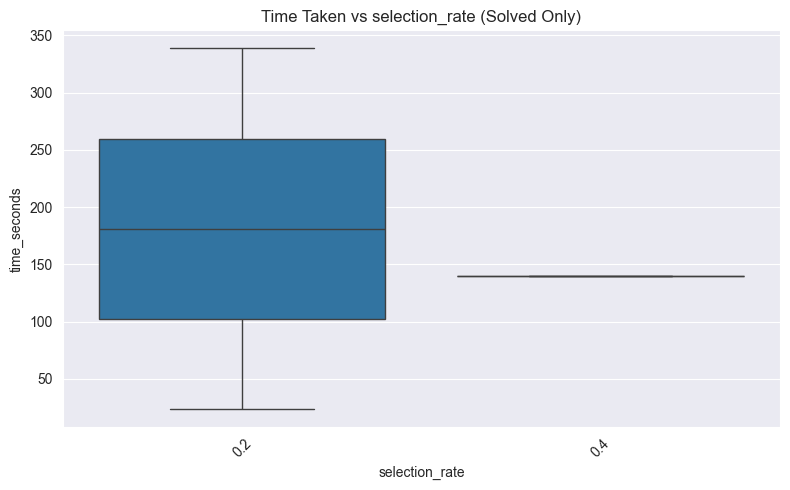

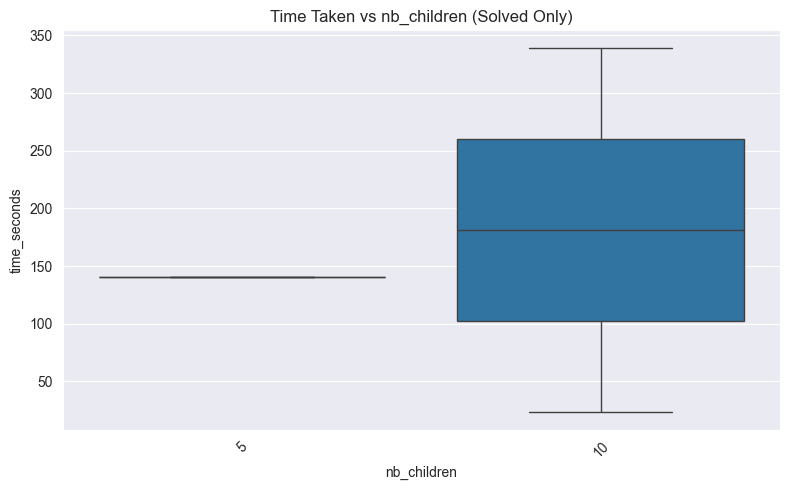

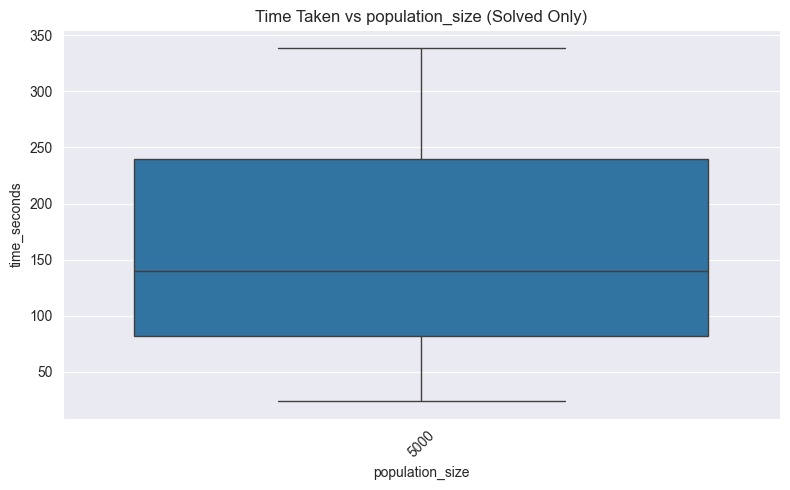

In [6]:
# Pick parameters to evaluate
param_cols = ["mutation_rate", "selection_rate", "nb_children", "population_size"]

# Time per parameter
for param in param_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=solved, x=param, y="time_seconds")
    plt.title(f"Time Taken vs {param} (Solved Only)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

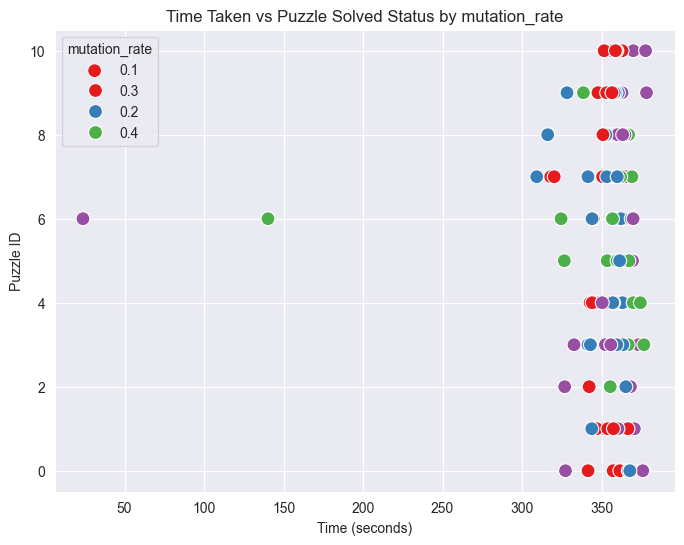

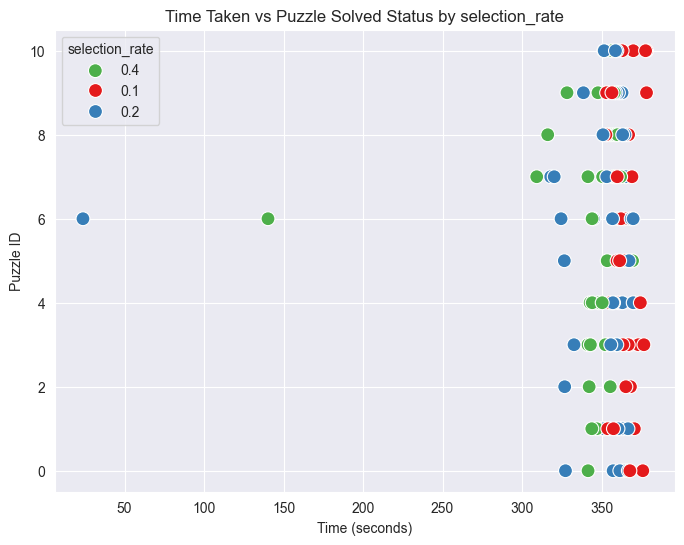

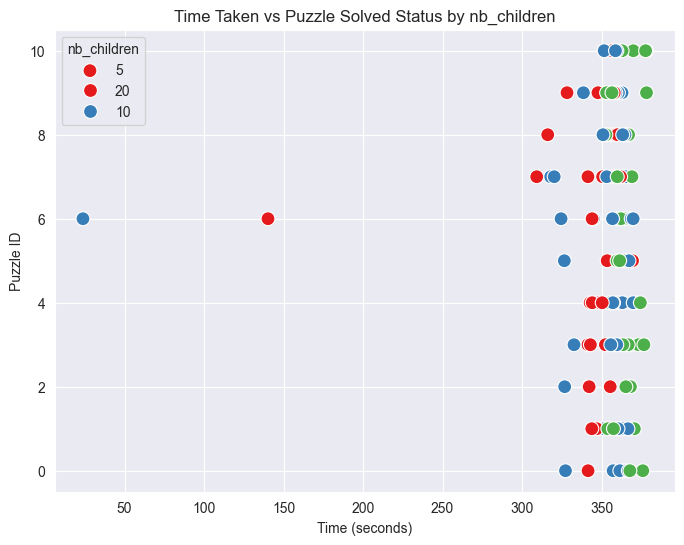

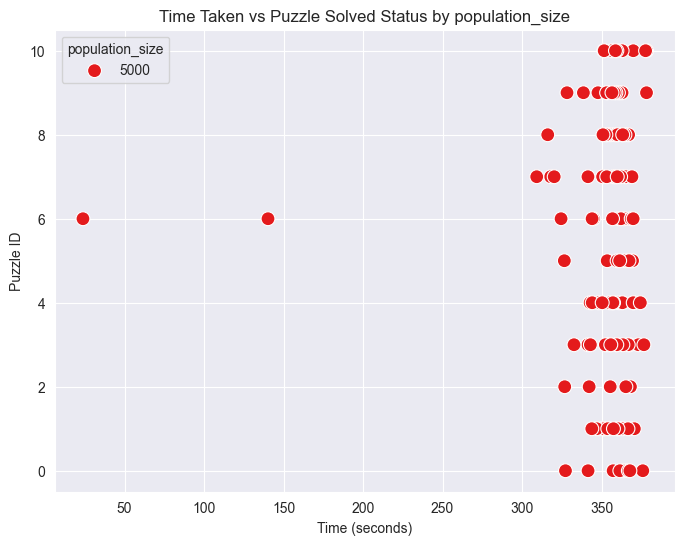

In [7]:
for param in param_cols:
    unique_values = easy[param].unique()
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='time_seconds', y='puzzle_id', hue=param, data=easy, palette='Set1', s=100)
    plt.title(f'Time Taken vs Puzzle Solved Status by {param}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Puzzle ID')
    plt.legend(title=param, labels=unique_values)
    plt.show()

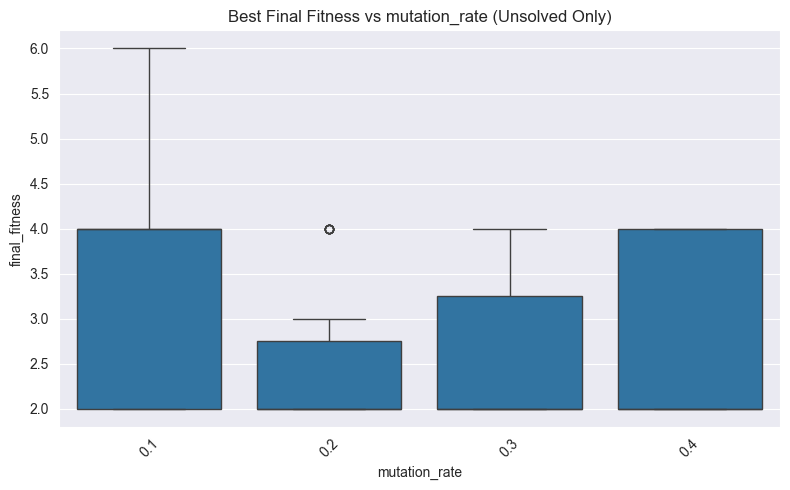

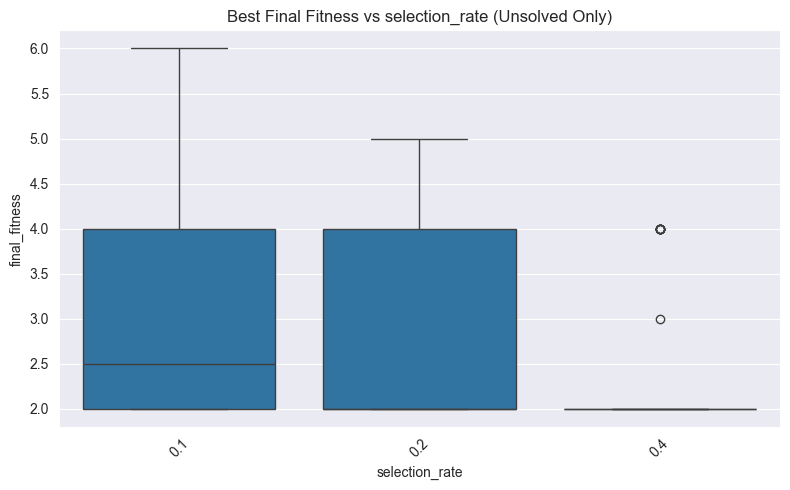

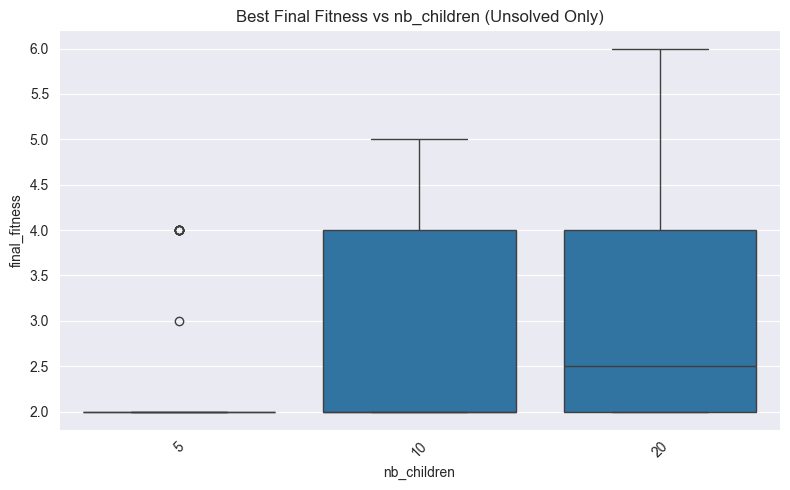

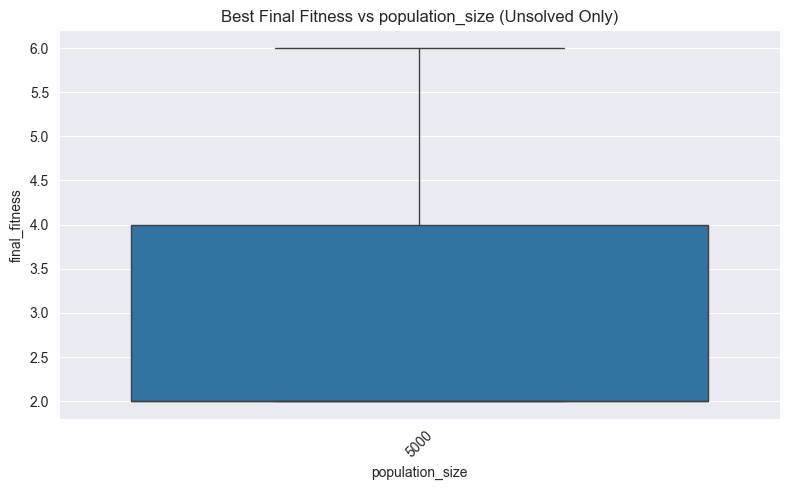

In [8]:
for param in param_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=unsolved, x=param, y="final_fitness")
    plt.title(f"Best Final Fitness vs {param} (Unsolved Only)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [9]:
# Top performing solved cases
top_solved = solved.sort_values(by="time_seconds").head(15)
print("Top Solved Cases (Fastest):")
display(top_solved[param_cols + ["time_seconds", "generations_run"]])

# Top unsolved by fitness
top_unsolved = unsolved.sort_values(by="final_fitness").head(10)
print("Top Unsolved Cases (Lowest Final Fitness):")
display(top_unsolved[param_cols + ["final_fitness", "generations_run"]])


Top Solved Cases (Fastest):


,mutation_rate,selection_rate,nb_children,population_size,time_seconds,generations_run
101,0.4,0.2,10,5000,23.84,63
60,0.3,0.4,5,5000,140.23,387
61,0.3,0.2,10,5000,338.60,930


Top Unsolved Cases (Lowest Final Fitness):


,mutation_rate,selection_rate,nb_children,population_size,final_fitness,generations_run
119,0.2,0.4,5,5000,2,1000
59,0.3,0.1,20,5000,2,1000
96,0.1,0.2,10,5000,2,1000
57,0.4,0.1,20,5000,2,1000
56,0.4,0.2,10,5000,2,1000
55,0.3,0.4,5,5000,2,1000
54,0.4,0.1,20,5000,2,1000
53,0.4,0.4,5,5000,2,1000
52,0.4,0.1,20,5000,2,1000
97,0.2,0.4,5,5000,2,1000


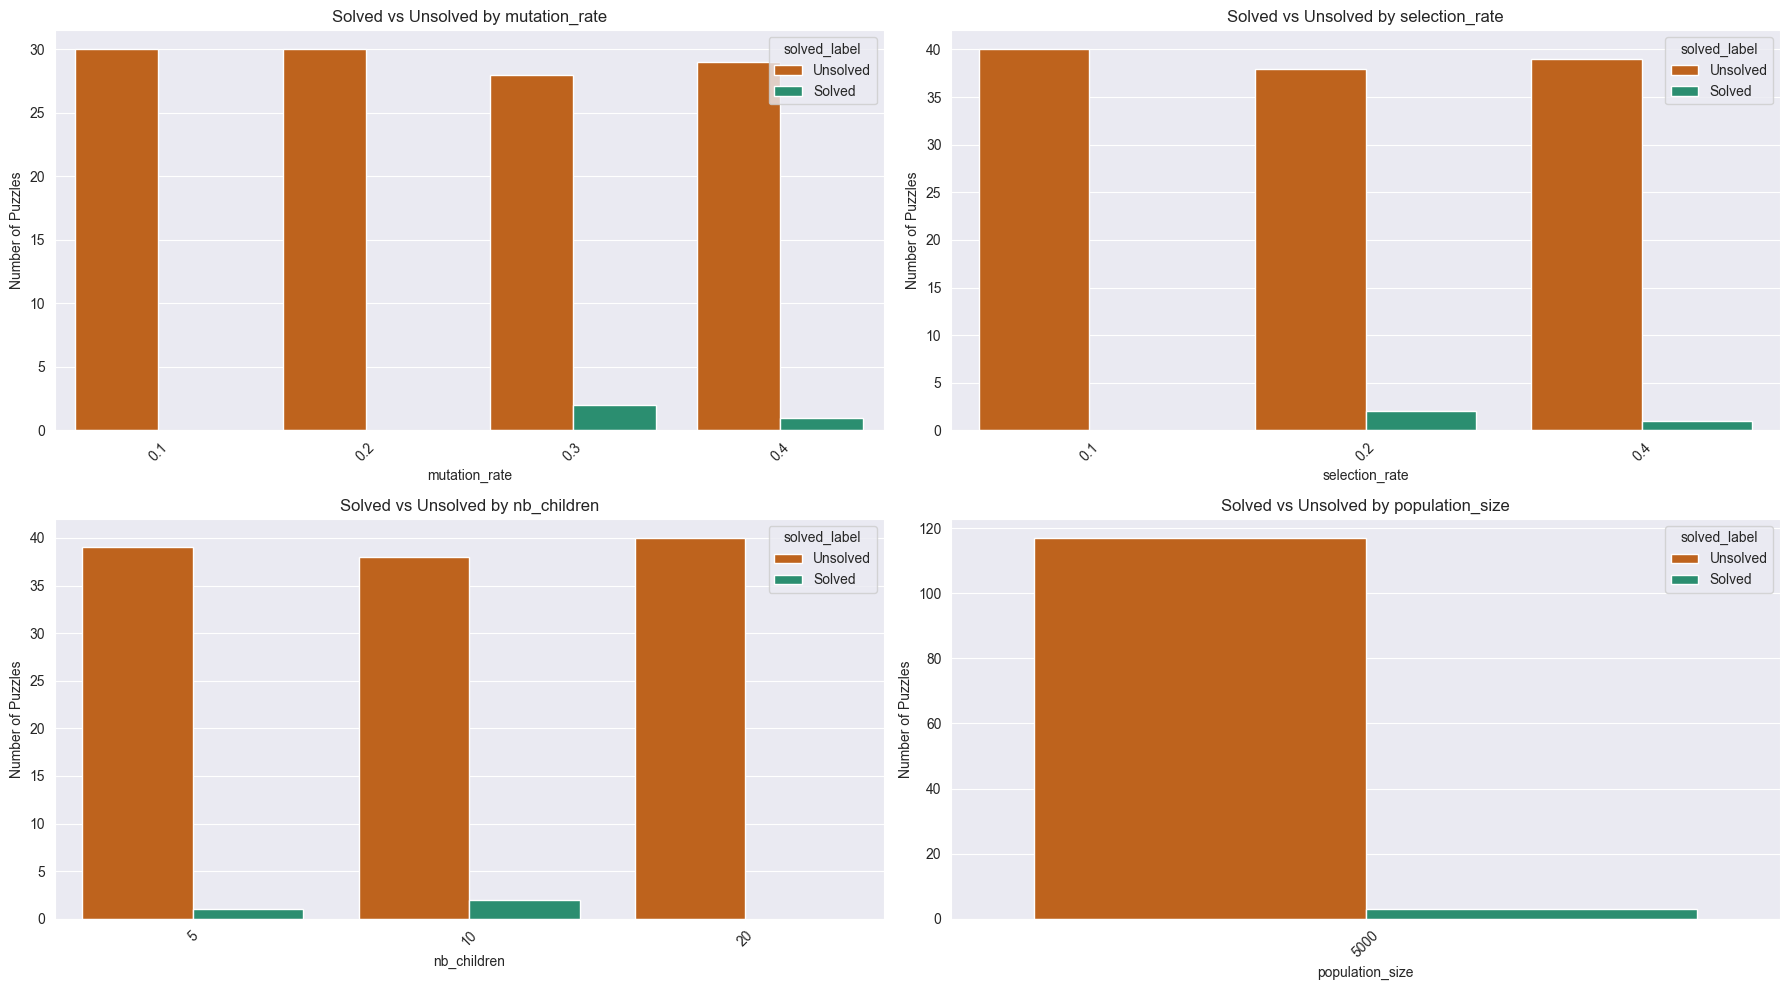

In [10]:
# Add a new column for display purposes
easy['solved_label'] = easy['solved'].map({0: 'Unsolved', 1: 'Solved'})

# Define consistent hue order and palette
hue_order = ["Unsolved", "Solved"]
palette = {"Unsolved": "#d95f02", "Solved": "#1b9e77"}

# Prepare subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

# Plot each parameter on a subplot
for i, param in enumerate(param_cols):
    ax = axes[i]
    sns.countplot(data=easy, x=param, hue='solved_label', hue_order=hue_order, palette=palette, ax=ax)
    ax.set_title(f"Solved vs Unsolved by {param}")
    ax.set_ylabel("Number of Puzzles")
    ax.set_xlabel(param)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(param_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


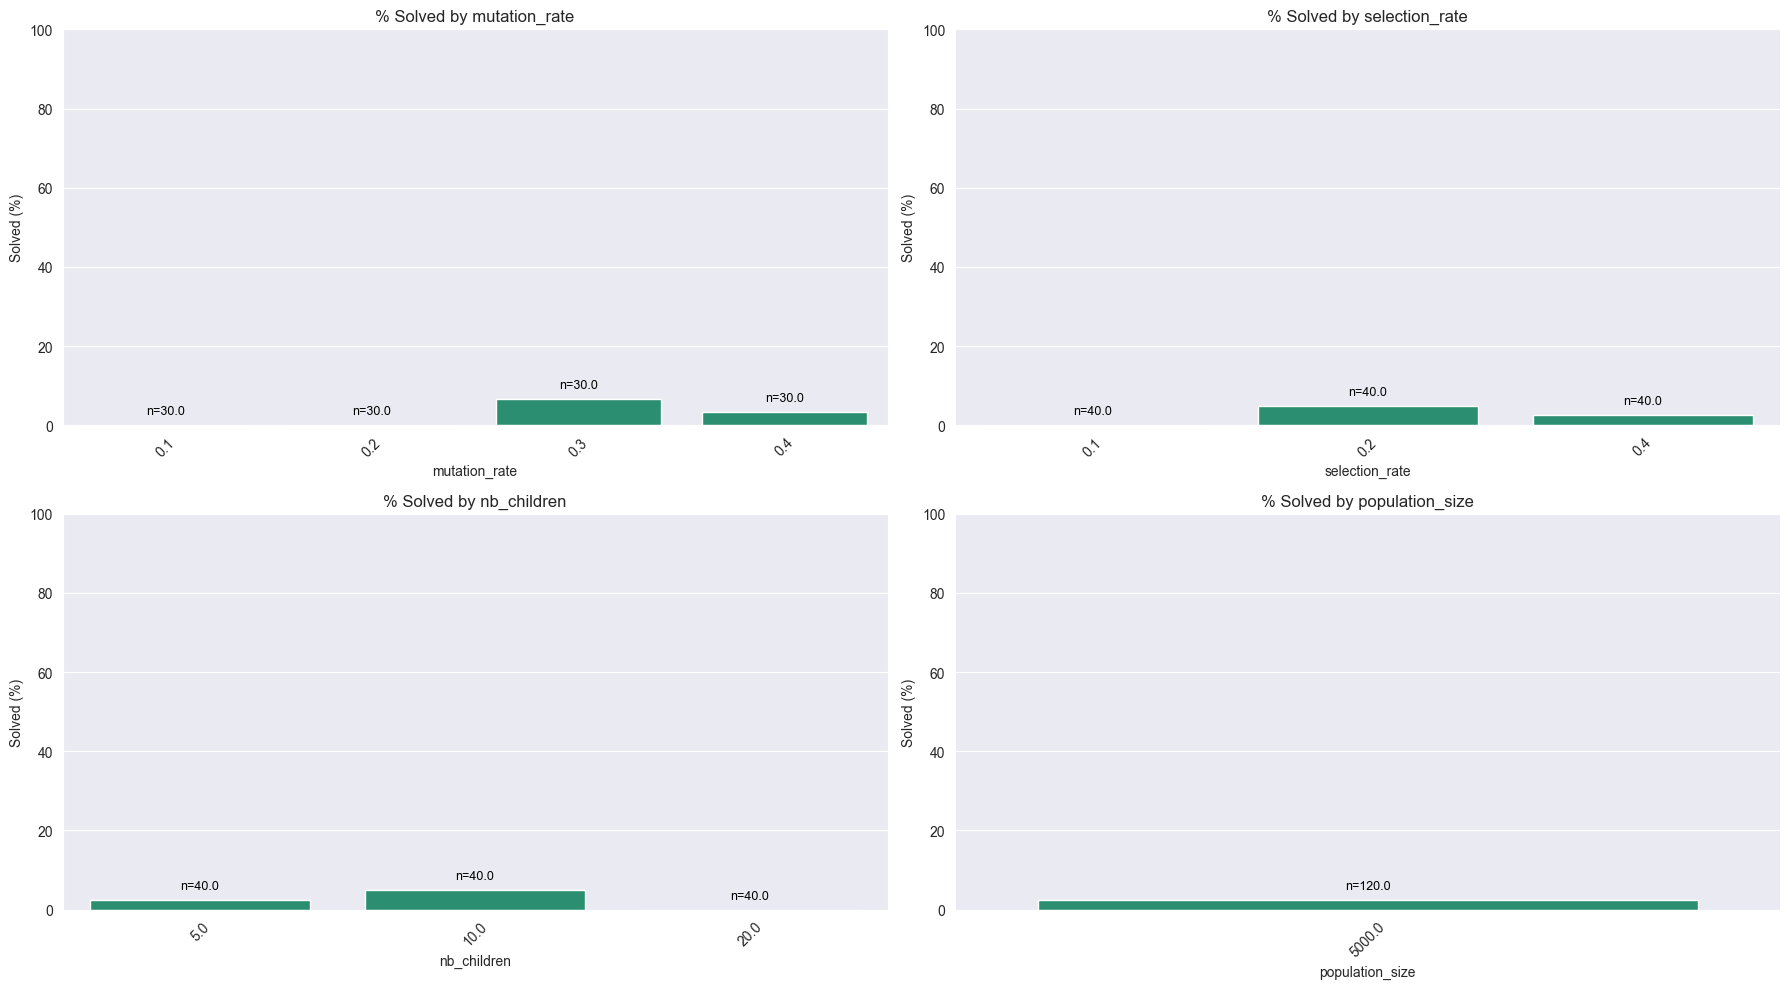

In [11]:
# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

# Plot each parameter on a subplot
for i, param in enumerate(param_cols):
    # Calculate percent solved and total attempts
    percent_df = (
        easy.groupby(param)['solved']
        .agg(['count', 'sum'])
        .reset_index()
        .rename(columns={'sum': 'solved_count', 'count': 'total'})
    )
    percent_df['percent_solved'] = 100 * percent_df['solved_count'] / percent_df['total']

    # Sort x-axis values numerically if possible
    try:
        percent_df[param] = percent_df[param].astype(float)
        percent_df = percent_df.sort_values(by=param)
    except ValueError:
        pass

    # Plot on the subplot
    ax = axes[i]
    sns.barplot(data=percent_df, x=param, y='percent_solved', color="#1b9e77", ax=ax)
    ax.set_title(f"% Solved by {param}")
    ax.set_ylabel("Solved (%)")
    ax.set_xlabel(param)
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)

    # Add count labels
    for j, row in percent_df.iterrows():
        ax.text(j, row['percent_solved'] + 2, f"n={row['total']}",
                ha='center', va='bottom', fontsize=9, color='black')

# Hide any unused subplots
for j in range(len(param_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
hardest_parameters = pd.read_csv('hardest11_improved_solved_results.csv')
hardest_parameters.head()

,puzzle_id,solved,time_seconds,generations_run,fitness
0,6,1,21.10,62,0
1,2,0,307.85,1000,2
2,3,0,310.02,1000,2
3,10,0,310.16,1000,2
4,8,0,310.40,1000,2


In [19]:
hardest_parameters['fitness'].mean()

1.8181818181818181

In [13]:
len(hardest_parameters[hardest_parameters['solved'] == 1])

1

/var/folders/b1/t_5vbv0n4_j3m_7gy69b59tm0000gn/T/ipykernel_18730/3329186050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='solved', data=hardest_parameters, palette='Set2')


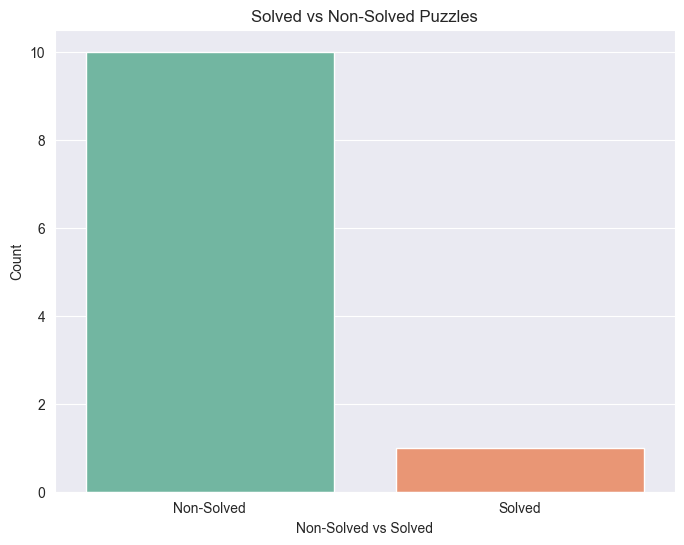

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='solved', data=hardest_parameters, palette='Set2')
plt.title('Solved vs Non-Solved Puzzles')
plt.xlabel('Non-Solved vs Solved')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Solved', 'Solved'])
plt.show()

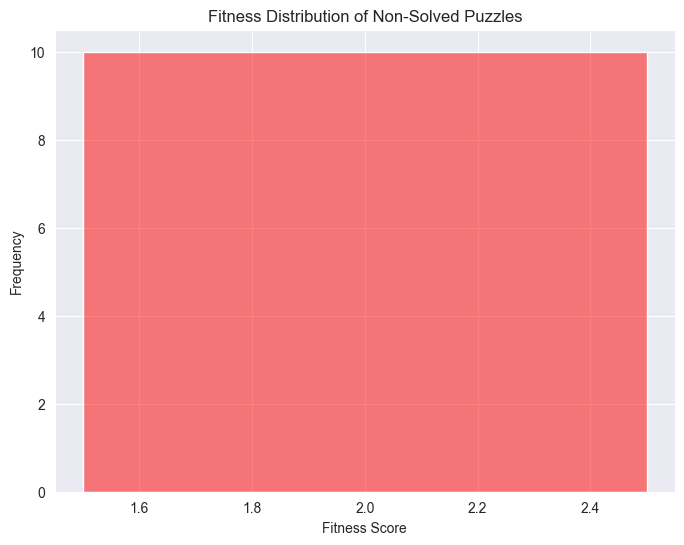

In [15]:
non_solved_df = hardest_parameters[hardest_parameters['solved'] == 0]

plt.figure(figsize=(8, 6))
sns.histplot(non_solved_df['fitness'], kde=True, color='red')
plt.title('Fitness Distribution of Non-Solved Puzzles')
plt.xlabel('Fitness Score')
plt.ylabel('Frequency')
plt.show()

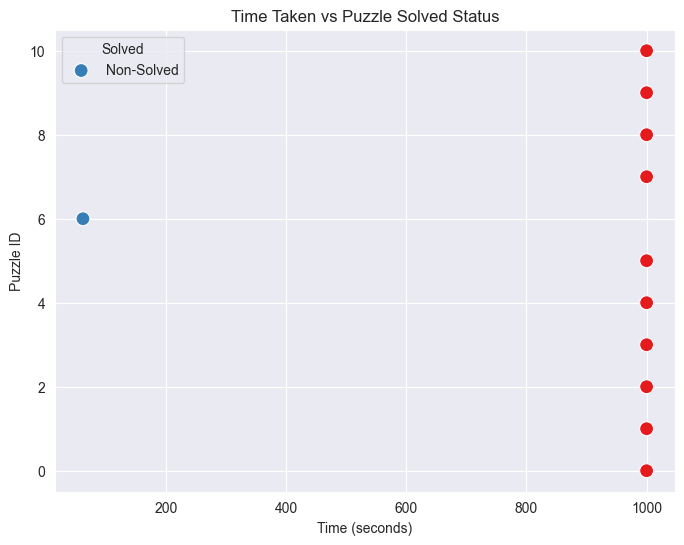

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='generations_run', y='puzzle_id', hue='solved', data=hardest_parameters, palette='Set1', s=100)
plt.title('Time Taken vs Puzzle Solved Status')
plt.xlabel('Time (seconds)')
plt.ylabel('Puzzle ID')
plt.legend(title='Solved', labels=['Non-Solved'])
plt.show()